# Introduction

## What is a Riemann Problem?

In 1860, Bernhard Riemann published a study titled "On the propagation of plane waves of finite amplitude" <cite data-cite="riemann1860fortpflanzung"><a href="riemann.html#riemann1860fortpflanzung">(Riemann, 1860)</a></cite>, the first mathematical analysis of the Euler equations of gas dynamics.  In that work, among many contributions, is a study of what came to be known as the **Riemann problem**: a hyperbolic partial differential equation (PDE) with initial data consisting of two constant states separated by a discontinuity.  The idea of discontinuous solutions to hyperbolic conservation laws was first suggested by Stokes <cite data-cite="stokes1848liv"><a href="riemann.html#stokes1848liv">(Stokes, 1848)</a></cite>, but experts at the time shied away from this idea; Stokes' suggestion was criticized by Lords Kelvin and Rayleigh.  In focusing on a problem with discontinuous data, Riemann not only accepted this idea but placed it at the center of our understanding of hyperbolic PDEs.  This history is recounted in more detail by Dafermos (see <cite data-cite="dafermos2010hyperbolic"><a href="riemann.html#dafermos2010hyperbolic">(Dafermos, 2010)</a></cite>).  As stated there, "Riemann's remarkable paper provides the foundation for the general theory of hyperbolic systems of conservation laws in one space dimension".  That theory revolves, to a great extent, around the Riemann problem and its solution.

For a hyperbolic system of $m$ PDEs, each of the states in the Riemann solution is a vector with $m$ components. We will generally use $q(x,t)\in\mathbb{R}^m$ to denote the generic solution to a hyperbolic problem in on space dimension, and denote the Riemann initial data by $q_\ell$ for for the left state (i.e. $q(x,0) = q_\ell$ for $x<0$) and $q_r$ for the right state  (i.e. $q(x,0) = q_r$ for $x \geq 0$).  

We will formally define what we mean by a hyperbolic system of PDEs shortly, but for now it suffices to know that these are the PDEs that naturally arise whenever we model wave propagation.   The work of Riemann and Stokes was motivated by the Euler equations of compressible gas dynamics; in this introduction we use examples involving the motion of water waves. Hyperbolic equations also arise in modeling waves in solids (e.g. seismic waves), in traffic, and in many other applications.

In a model of small amplitude waves, the equations may be linear (e.g. acoustics or linear elasticity, modeling seismic waves for example).  These PDEs arise from a linear approximation to more general nonlinear hyperbolic systems that are also valid for larger amplitude waves (e.g. the Euler equations of compressible gas dynamics, or nonlinear elastic wave equations).

The plots shown in this chapter are created using a function that is defined in the Python module 

 - [exact_solvers/shallow_water.py](exact_solvers/shallow_water.py) ...
   [on github.](https://github.com/clawpack/riemann_book/blob/FA16/exact_solvers/shallow_water.py)

In all of the notebooks, much of the Python code that is used behind the scenes is imported from modules in the `exact_solvers` subdirectory, including the grungy details to make nice plots.  Much of the code for actually solving the Riemann problems is also in these modules, so if you want to dive into the implementations, you will need to examine that code.  Near the top of each notebook there is a link to the relevant modules for that chapter.  The versions on Github may be nicer to read since the syntax is automatically highlighted.

Note also that the import statements are hidden in the printed version of each notebook, to reduce clutter.

## An example: the dam break problem

To get a feel for what a Riemann problem and its solution look like, consider a *dam break* problem in which a dam initially separates water with constant depth $h_\ell$ to the left of the dam from water with depth $h_r$ to the right of the dam.  Suppose the water is initially stationary, with velocity 0 on both sides of the dam.   This situation is depicted in the figure below, with water behind the dam shaded light blue and water in front of the dam shaded dark blue.

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'
from exact_solvers.shallow_water import make_demo_plot_function
from ipywidgets import interact
from ipywidgets import widgets, fixed
from IPython.display import IFrame

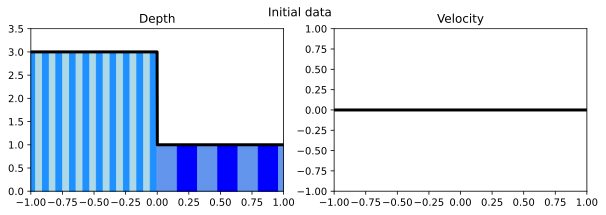

In [3]:
make_demo_plot_function(h_l=3., h_r=1., u_l=0., u_r=0)(t=0)

Now suppose we remove the dam at time $t=0$.  What happens for $t>0$?

If the water to the left of the dam is deeper than the water to the right (i.e. $h_\ell > h_r$) then we expect water to flow from left to right in some manner.  In reality we might expect the flow to be turbulent and multidimensional, but for now let us idealize this with a one-dimensional model in which the velocity is purely horizontal and is constant throughout the depth of the fluid, so for $t>0$ the velocity varies only with $x$ and $t$, given by some function $u(x,t)$, and the depth is given by $h(x,t)$.  In [Shallow_water](Shallow_water.ipynb) we will discuss the one-dimensional **shallow water equations** that can be used to model this idealized situation. 

The figure below shows the solution to the shallow water equations in the situation just described *(as an animation in the live notebook or html versions)*. Again, the water is colored light blue for water that is initially to the left of the dam and dark blue for water that is initially to the right.  The stripes with different shading are to help you visualize the flow; each stripe represents the same volume of water.  Think of the color as a dye that is simply carried along with the water as it flows.  In [Shallow_tracer](Shallow_tracer.ipynb) we will see that we can in fact model this by adding another equation to the shallow water equations for the density of a tracer.

In [4]:
interact(make_demo_plot_function(h_l=3., h_r=1., u_l=0., u_r=0),
         t=widgets.FloatSlider(min=0., max=0.6, step=0.1,
                               value=0.), fig=fixed(0));

interactive(children=(FloatSlider(value=0.0, description='t', max=0.6), Output()), _dom_classes=('widget-inter…

### Things to note about this animation

 - Initially the fluid velocity $u(x,0) \equiv 0$ at $t=0$.  For $t>0$, the water remains stationary far from away from the dam.  The region where the water is not stationary grows linearly outward from $x=0$ as $t$ increases.
 - The fluid is accelerated to the right as water starts to flow.
 - Water upstream from the dam (for $x<0$) starts to accelerate slowly as the depth of the water starts to fall, and both the depth and the velocity remain continuous functions of $x$ in this region for all time. The depth and velocity vary through a **rarefaction wave** that moves upstream.
 - The water downstream from the dam is stationary until a **shock wave** passes by, which instantaneously accelerates the fluid from $u_r=0$ to some constant velocity $u_m >0$.  At the same time the depth increases from $h_r$ to $h_m$. This *middle state* depth and velocity is the same as the depth and velocity that the light blue water upstream from the dam also reaches once it has passed through the rarefaction wave and been fully accelerated.
 - The shock wave moves at a constant velocity $s_r > u_m$.
 - The rarefaction wave spreads out as time evolves and the left and right edges move at constant velocities $\lambda_{l1}$ and $\lambda_{m1}$. We will see later that these speeds are eigenvalues of a certain Jacobian matrix.


A **shock wave** is a type of wave often seen when solving nonlinear hyperbolic equations.  The solution is discontinuous across a shock wave, which means that special mathematical techniques must be used to make sense of functions like this as solutions of a differential equation.  It also means that special algorithmic techniques must be used to compute accurate numerical solutions to such equations.  Simply replacing derivatives by finite differences typically does not work well. 

In the context of water waves, this shock wave is often called a **hydraulic jump**.  In a real dam break problem the solution would not be discontinuous, but there might be turbulent bore that, from far enough away, looks like a discontinuity.  The nonlinear shallow water equations can be used to model such flows in the sense that the jump in depth and velocity and the propagation speed of the shock wave closely approximate the hydraulic jump and speed of the bore.

The nonlinear shallow water equations are usually solved in terms of the variables $q = [h, hu]$, where $h$ is the depth (mass per unit length) and $hu$ is the density of momentum (per unit length).  For flow on a flat bottom these are conserved quantities, and the hyperbolic problem in this case is called a **hyperbolic conservation law**.  For nonlinear hyperbolic equations, conservation is the key to understanding the propagation of shock waves, as we will explore in several chapters.

## Why is the Riemann problem important?

Why study the simple case of piecewise constant initial data?  Here are some motivations:

 - As we have just seen, even this simple initial data can lead to complicated solutions.  
 
 - However, the solution is simple enough that there is some hope we can determine it exactly, even for nonlinear systems of PDEs.
 
 - In the animation above we noted that the shock wave and the two edges of the rarefaction wave are all moving at *constant speeds*.  In fact if we plot contours of the depth (or the velocity) in the $x$-$t$ plane, we find that the value of each variable is constant along any ray $x = at$ from the origin.  In other words $h(x,t) = H(x/t)$ and $u(x,t) = U(x/t)$ for some functions $H$ and $U$ of a single variable.  The solution is said to be a **similarity solution** and this structure greatly facilitates solving the Riemann problem.  This is true even for nonlinear hyperbolic problems provided certain conditions are satisfied.

 - Developing an understanding of how the Riemann solution behaves for all possible choices of left and right states for a hyperbolic problem is essential for understanding the behavior of more complicated solutions.
 
 - The development of mathematical theory of hyperbolic problems has relied extensively on the understanding that comes from studying Riemann problems.
 
 - Many robust numerical methods for approximating the solution with more general initial data use the Riemann solution as an essential building block.  The most basic method of this type is **Godunov's method**, described below. Numerical methods typically make use of *approximate Riemann solvers*, which are often computationally cheaper than an exact solver.
 

While we usually think of the Riemann problem as describing the solution on a small scale near a discontinuity, it is also relevant to describing the large-scale, long-time behavior of solutions.  Let us consider the general one-dimensional Cauchy problem, and suppose that

\begin{align*}
\lim_{x\to-\infty} q(x,0) & = q_\ell \\
\lim_{x\to\infty} q(x,0) & = q_r.
\end{align*}

Under some additional technical assumptions it turns out that, regardless of the initial data in between these asymptotic states, the solution will eventually tend toward the solution of the Riemann problem with states $q_\ell, q_r$ (see, e.g., <cite data-cite="liu2000hyperbolic"><a href="riemann.html#liu2000hyperbolic">(Liu, 2000, Section 1.6)</a></cite>
or <cite data-cite="dafermos2010hyperbolic"><a href="riemann.html#dafermos2010hyperbolic">(Dafermos, 2010, Theorem 11.5.3)</a></cite>).  Thus the solution of the Riemann problem can be used to understand both the small-scale and the large-scale behavior of solutions.

## The Riemann problem for the shallow water equations

The more general Riemann problem for the shallow water equations has arbitrary depths $h_\ell, h_r \geq 0$ and also arbitrary velocities $u_\ell$ and $u_r$ to the left and right of $x=0$.  The dam break problem considered above is a special case where $u_\ell = u_r = 0$.  

In the dam break problem considered above with $h_\ell > h_r$, the solution consists of a left-going rarefaction wave and a right-going shock wave.  If we instead have $h_\ell < h_r$ with $u_\ell=u_r=0$, then the water flows to the left and the Riemann solution has a left-going shock wave and a right-going rarefaction wave.

In [ ]:
interact(make_demo_plot_function(h_l=1., h_r=3., u_l=0., u_r=0),
         t=widgets.FloatSlider(min=0.0, max=0.6, step=0.1,
                               value=0.), fig=fixed(0));

By choosing non-zero velocities in the initial data, we can also obtain other combinations of shock and rarefaction waves. For example, if the depth is initially the same everywhere ($h_\ell = h_r$) while the velocities satisfy $u_\ell>0$ and $u_r<0$ (modeling two opposing streams of water colliding at $x=0$) then the Riemann solution consists of two shock waves. Note that the water is deeper between the shock waves, and in the symmetric case $u_r = -u_\ell$ the water is stationary ($u=0$) in the region between the shocks:

In [ ]:
interact(make_demo_plot_function(h_l=1., h_r=1., u_l=0.8, u_r=-0.8),
         t=widgets.FloatSlider(min=0., max=0.6, step=0.1,
                               value=0.), fig=fixed(0));

On the other hand, if $u_\ell<0$ and $u_r>0$ (so that the water is moving away from $x=0$ on both sides) then the solution consists of two rarefaction waves:

In [ ]:
interact(make_demo_plot_function(h_l=1., h_r=1., u_l=-0.8, u_r=0.8),
         t=widgets.FloatSlider(min=0.0, max=0.6, step=0.1,
                               value=0.), fig=fixed(0));

In [Shallow_water](Shallow_water.ipynb) we will show how to solve the Riemann problem for arbitrary left and right states and in particular how to determine whether each wave is a shock or rarefaction wave.

## What is a hyperbolic PDE?

In this book we consider only first-order hyperbolic equations, meaning equations that involve only first derivatives in space and time. Many important hyperbolic PDE models can be written as a system of conservation laws:  
\begin{align} \label{intro:multiDconslaw}
    q_t + \nabla \cdot F(q) & = 0.
\end{align}  
Here $q(x,t)$ is a vector of conserved quantities (e.g. mass, momentum, energy) and each component of $F(q)$ is the corresponding flux.  In practice (and in most of this book) we focus on one-dimensional problems, for which (\ref{intro:multiDconslaw}) can be written  
\begin{align} \label{intro:conslaw}
    q_t + f(q)_x & = 0.
\end{align}  
If the flux in (\ref{intro:conslaw}) is a linear function $f(q)= Aq$ for some matrix $A$, then we have  
\begin{align} \label{intro:linconslaw}
    q_t + A q_x & = 0,
\end{align}  
We say that (\ref{intro:linconslaw}) is **hyperbolic** if $A$ is diagonalizable with real eigenvalues; similarly, we say the nonlinear system (\ref{intro:conslaw}) is hyperbolic at some state $q$ if the Jacobian matrix $f'(q)$ is diagonalizable with real eigenvalues.

A common property of these equations is that *information travels at finite speed* and they model *waves*.  As we will see in more detail later, the eigenvalues of $f'(q)$ correspond to *wave speeds* while the eigenvectors tell us about the relation between the components of $q$ in each wave.

Some examples of physical problems that can be modeled with hyperbolic PDEs (and are included as examples in this book) are:

- Sound waves (acoustics)
- Gravity waves in shallow water
- Traffic flow
- Compressible gas dynamics
- Elastic waves (e.g. seismology)

## Godunov's method
The role of the Riemann problem in the numerical solution of hyperbolic conservation laws can be traced back to the work of Godunov <cite data-cite="godunov1959difference"><a href="riemann.html#godunov1959difference">(Godunov, 1959)</a></cite>.  He proposed a method of approximation based on the following steps:

1. Approximate the solution by a piecewise-constant function, e.g. by averaging it over a set of intervals (or *grid cells*).
2. Solve the Riemann problem arising at each point of discontinuity (i.e., at the cell interfaces).
3. Using the Riemann solution, evolve the overall solution forward for a short time (before waves from neighboring Riemann problems can interact).  Then re-average to obtain a piecewise-constant approximation, and repeat.

Godunov's method remains the basis for many modern numerical approaches.  A number of refinements have been made.  First, instead of representing the solution by a piecewise-constant function, solvers may use a piecewise-polynomial representation of higher degree.  Second, instead of solving the Riemann problem exactly, most modern methods use **approximate Riemann solvers**.  Approximate solutions can often be obtained at much lower computational cost.  Furthermore, the approximate Riemann solver can be designed so as to make the overall numerical solver more robust, by avoiding unphysical solution states.  In Part II of this book we explore some approximate solvers.

## A linear example: acoustic waves

We end this introduction with a sample linear system. Acoustic waves in one dimension can be modeled by the system of PDEs  
\begin{align}
\begin{split} 
    p_t + K u_x & = 0 \\
    u_t + \frac{1}{\rho} p_x & = 0,
\end{split}  \label{intro:acoustics}
\end{align}  
where $p$ represents the deviation from ambient pressure, $u$ is velocity, $K$ is the bulk modulus and $\rho$ is the density of the medium.  This first-order system is equivalent to the familiar wave equation $u_{tt} = c^2 u_{xx}$ with $c = \sqrt{K/\rho}$, which can be derived from (\ref{intro:acoustics}) by differentiating the first equation with respect to $x$, the second with respect to $t$, and then eliminating $p_{tx} = p_{xt}$.  Recall that $c$ represents the speed of propagation of waves in the wave equation.  Coming back to the first-order form (\ref{intro:acoustics}), we can write it in the canonical form (\ref{intro:linconslaw}) by setting  
\begin{align*}
    q & = \begin{bmatrix} p \\ u \end{bmatrix}, &
    A & = \begin{bmatrix} 0 & K \\ 1/\rho & 0 \end{bmatrix}.
\end{align*}  
The eigenvalues of $A$ are $\pm \sqrt{K/\rho} = \pm c$; it is true in general that the speed of propagation of waves in (\ref{intro:linconslaw}) is given by the eigenvalues of $A$, and this hints at the importance of the condition that $A$ be diagonalizable with real eigenvalues.

### The Riemann problem for acoustics
The Riemann problem consists of (\ref{intro:acoustics}) together with initial data  
\begin{align*}
    (p_0,u_0) & = \begin{cases} (p_\ell, u_\ell) & \text{ for } x<0 \\
                                (p_r, u_r) & \text{ for } x>0. \end{cases}
\end{align*}  
The solution of the Riemann problem for this simple linear system consists of two jumps, one proportional to each of the eigenvectors of $A$, and each moving with velocity equal to the corresponding eigenvalue of $A$.  Between these two jumps lies a middle state different from the left and right states; we can think of solving the Riemann problem by finding the intersection (in the $p$-$u$ plane, called the *phase plane*) of lines passing through the left and right states that are each parallel to the appropriate eigenvector of A.  This example is explored in more detail in [Acoustics](Acoustics.ipynb).

Below (in the notebook version, or on [this webpage](http://www.clawpack.org/riemann_book/phase_plane/acoustics_small.html)). 
we show the phase plane and the location of $q_m$ relative to $q_\ell$ and $q_r$.  You can drag the left and right states around to see how this changes the solution.  Also shown in the other two plots are the pressure $p(x,t)$ and velocity $u(x,t)$ at one particular time $t=1$ for this Riemann solution.

In [ ]:
IFrame(src='phase_plane/acoustics_small_notitle.html', 
       width=980, height=340)

## Phase plane plot for the shallow water equations

The phase plane plot for the nonlinear shallow water equations is more interesting.  Since the eigenvectors of the Jacobian matrix vary with $q$, the curves connecting states separated by a single wave are not straight lines. There is also a distinction between the curves connecting states by a shock wave and those connecting states by a rarefaction wave.  This is discussed in much more detail in [Shallow_water](Shallow_water.ipynb).  

Below, in the notebook, or on [this webpage](http://www.clawpack.org/riemann_book/phase_plane/shallow_water_small.html), we provide an interactive view that allows you to see how the solution changes as you move the left and right states around in the phase plane. Note that for this nonlinear system the situation is much more complicated than in the linear acoustics case.

In [ ]:
IFrame(src='phase_plane/shallow_water_verysmall.html', 
       width=600, height=530)